# Data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Data/heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Potential problems to explore
#### 1. Does age or gender affect the likelihood of heart disease?

#### 2. Which risk factors are most common in patients with heart disease?

#### 3. What are some of the metric patterns that raise the likelihood of heart disease in patients ?

# David Arzumanyan

In [4]:
data.shape

(920, 16)

In [5]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
# Checking for duplicated rows
np.sum(data.duplicated())

np.int64(0)

In [8]:
# Checking inconsistent or invalid Entries
print(pd.unique(data["sex"].values))
print(pd.unique(data["dataset"].values))
print(pd.unique(data["cp"].values))
print(pd.unique(data["restecg"].values))
print(pd.unique(data["exang"].values))
print(pd.unique(data["oldpeak"].values))
print(pd.unique(data["slope"].values))
print(pd.unique(data["ca"].values))
print(pd.unique(data["thal"].values))
print(pd.unique(data["num"].values))

['Male' 'Female']
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
[False True nan]
[ 2.3  1.5  2.6  3.5  1.4  0.8  3.6  0.6  3.1  0.4  1.3  0.   0.5  1.6
  1.   1.2  0.2  1.8  3.2  2.4  2.   2.5  2.2  2.8  3.   3.4  6.2  4.
  5.6  2.9  0.1  2.1  1.9  4.2  0.9  1.1  3.8  0.7  0.3  4.4  5.   nan
 -1.1 -1.5 -0.1 -2.6 -0.7 -2.  -1.   1.7 -0.8 -0.5 -0.9  3.7]
['downsloping' 'flat' 'upsloping' nan]
[ 0.  3.  2.  1. nan]
['fixed defect' 'normal' 'reversable defect' nan]
[0 2 1 3 4]


In [9]:
print(np.sum(data["restecg"].isna()))
data = data.dropna(subset=["restecg"])

2


In [10]:
print(np.sum(data["exang"].isna()))
data = data.dropna(subset="exang")

55


In [11]:
# There are some oldpeak values that are negative and unusal
# Since it's just 12 of them we will remove them
np.sum(data["oldpeak"] < 0)
data = data.drop(data[data["oldpeak"] < 0].index) 

In [12]:
# Fixing null "Slope" values

# Healty heart during exercies
print(np.sum(data[(data["thalch"] > 125) & (data["exang"] == False) & (data["oldpeak"] == 0.0)]["slope"].isna()))

# Medium ischemia
print(np.sum(data[((data["thalch"] > 115) & (data["thalch"] <= 125)) & 
     ((data["oldpeak"] > 1) & 
      (data["oldpeak"] <= 3.5))]["slope"].isna()))

# Significant ischemia
print(np.sum(data[(data["thalch"] < 120) & (data["exang"] == True) & (data["oldpeak"] > 3.5)]["slope"].isna()))

155
2
0


In [13]:
# Healthy heart slope
data.loc[(data["thalch"] > 125) & 
         (data["exang"] == False) & 
         (data["oldpeak"] == 0.0) & 
         (data["slope"].isna()), 
         "slope"] = "upsloping"

# Medium ischemia slope
data.loc[(data["thalch"] > 115) & 
         (data["thalch"] <= 125) & 
         (data["oldpeak"] > 1) & 
         (data["oldpeak"] <= 3.5) &
         (data["slope"].isna()),
         "slope"] = "flat"

# Significant ischemia slope
data.loc[(data["thalch"] < 120) & 
         (data["exang"] == True) & 
         (data["oldpeak"] > 3.5) &
         (data["slope"].isna()),
         "slope"] = "downsloping"

In [14]:
# Dropping the remaining null slope values
np.sum(data["slope"].isna())
data = data.dropna(subset=["slope"])

In [15]:
# Filling missing "ca" (major vessels observed) values with -1 as a placeholder
# that a data is missing
data["ca"] = data["ca"].fillna(-1)

In [16]:
# "thal" thallium stress test column
data["thal"] = data["thal"].fillna("unknown")

In [17]:
# "fbs" 
'''A fasting blood sugar over 120 mg/dL suggests hyperglycemia, which may indicate Diabetes mellitus, or
Impaired glucose tolerance (pre-diabetes). We will leave null values to indicate not performed tests''' 

'A fasting blood sugar over 120 mg/dL suggests hyperglycemia, which may indicate Diabetes mellitus, or\nImpaired glucose tolerance (pre-diabetes). We will leave null values to indicate not performed tests'

| Cholesterol level (mg/dL) | Classification  | Meaning                       |
| ------------------------- | --------------- | ----------------------------- |
| `< 200`                   | Desirable       | Normal range                  |
| `200–239`                 | Borderline high | Elevated risk                 |
| `≥ 240`                   | High            | Risk factor for heart disease |


In [18]:
# "chol" - filling with -1 to indicate missing values
data["chol"] = data["chol"].fillna(-1)

In [19]:
# Filling trestbps with "unkown"
data["testbps"] = data["trestbps"].fillna("unkown")

In [20]:
# Intentionally left the "fbs" nan values to flag those values as missing
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 915
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        754 non-null    int64  
 1   age       754 non-null    int64  
 2   sex       754 non-null    object 
 3   dataset   754 non-null    object 
 4   cp        754 non-null    object 
 5   trestbps  751 non-null    float64
 6   chol      754 non-null    float64
 7   fbs       688 non-null    object 
 8   restecg   754 non-null    object 
 9   thalch    754 non-null    float64
 10  exang     754 non-null    object 
 11  oldpeak   754 non-null    float64
 12  slope     754 non-null    object 
 13  ca        754 non-null    float64
 14  thal      754 non-null    object 
 15  num       754 non-null    int64  
 16  testbps   754 non-null    object 
dtypes: float64(5), int64(3), object(9)
memory usage: 106.0+ KB


In [22]:
# Adding a new column of patients having a heart disease
data["has_disease"] = (data["num"] > 0).astype(int)
data["has_disease"]

0      0
1      1
2      1
3      0
4      0
      ..
910    0
911    1
912    1
914    1
915    1
Name: has_disease, Length: 754, dtype: int64

In [24]:
data["has_disease"].value_counts(normalize=True)

has_disease
1    0.545093
0    0.454907
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Age distribution by Heart Disease')

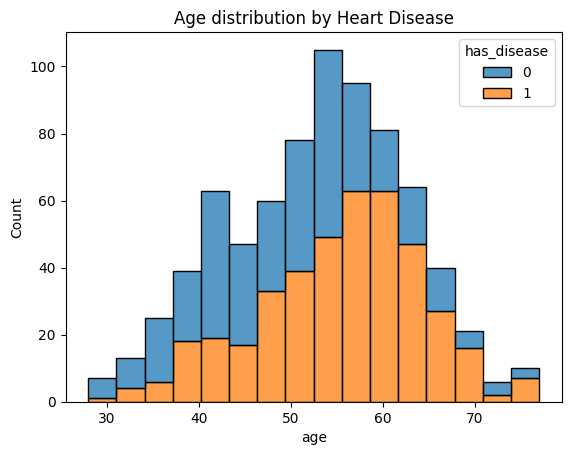

In [108]:
sns.histplot( x='age', hue='has_disease', data=data, multiple='stack')
plt.title("Age distribution by Heart Disease")

Text(0.5, 1.0, 'Male/Female Heart Disease count')

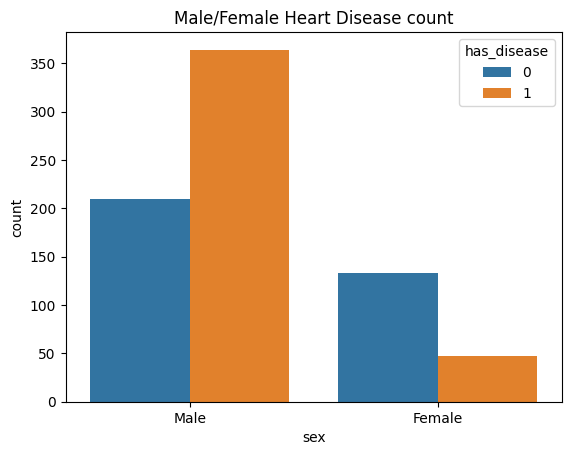

In [96]:
# Male/Female Heart Disease presence count
sns.countplot(x="sex", hue="has_disease", data=data)
plt.title("Male/Female Heart Disease count")

Text(0.5, 1.0, 'Male/Female Heart Disease ratio')

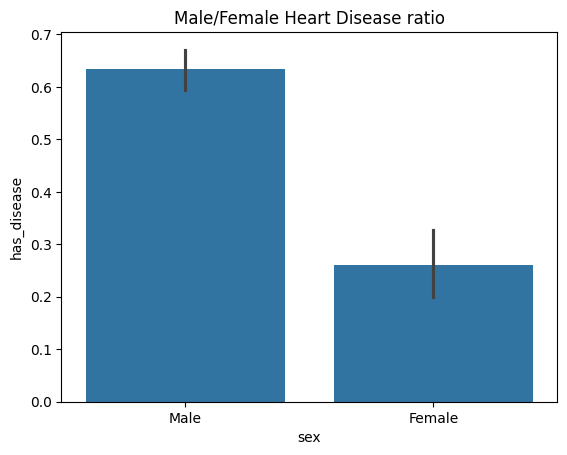

In [92]:
# Male/Female Heart Disease presence ratio
sns.barplot(x="sex", y="has_disease", data=data, estimator=np.mean)
plt.title("Male/Female Heart Disease ratio")

<Axes: xlabel='sex', ylabel='Severity of disease'>

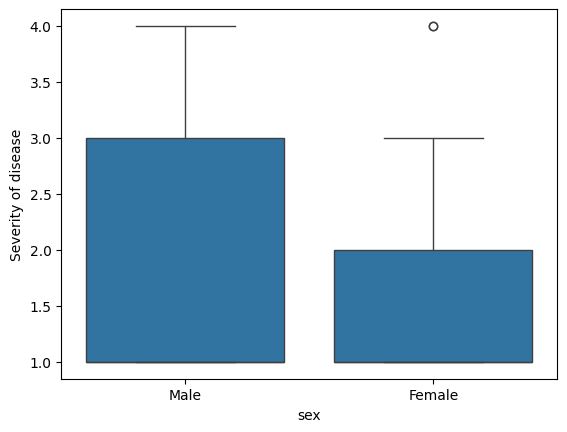

In [84]:
# Severity of heart disease based on gender
has_disease = data[data["num"] > 0]
plt.ylabel("Severity of disease")
sns.boxplot(x="sex", y="num", data=has_disease)

<Axes: xlabel='Severity of disease', ylabel='age'>

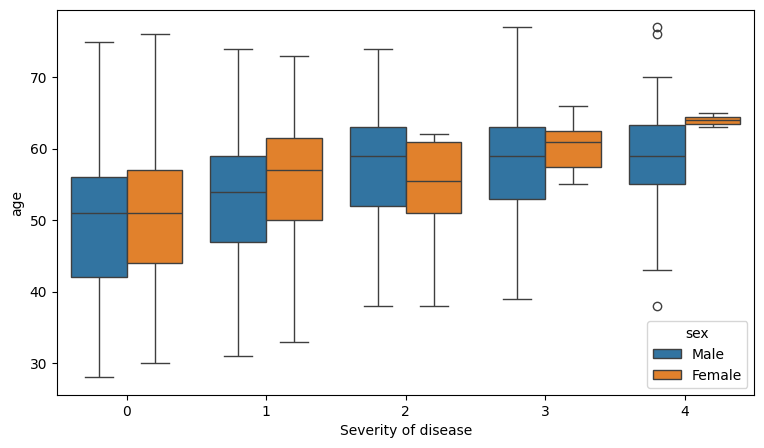

In [83]:
# Heart disease presence and severity based on age and gender
plt.figure(figsize=(9,5))
plt.xlabel("Severity of disease")
sns.boxplot(x="num", y="age", data=data, hue="sex")

<Axes: xlabel='Severity of disease', ylabel='age'>

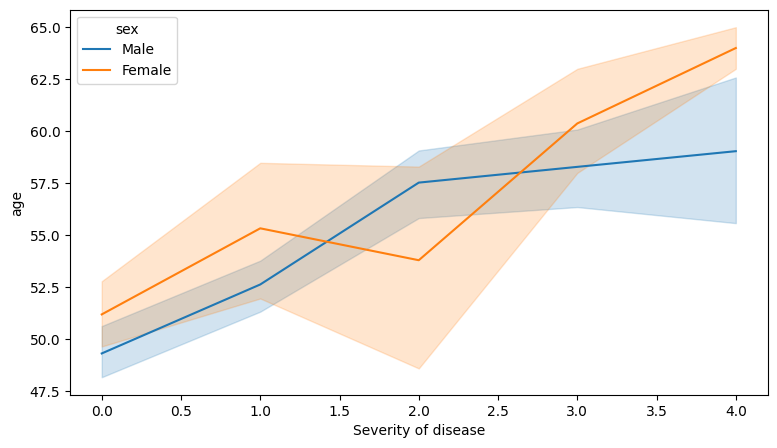

In [82]:
plt.figure(figsize=(9,5))
plt.xlabel("Severity of disease")
sns.lineplot(x="num", y="age", data=data, hue="sex")

# Daniel Tapia

# Raghav Vaid